In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [88]:
df=pd.read_csv("Iris.csv")

In [89]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
# Check missing Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

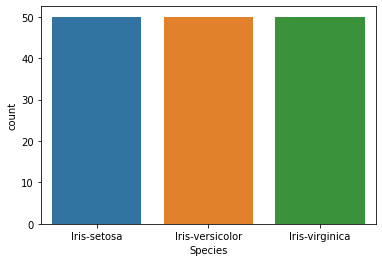

In [91]:
sns.countplot(x="Species",data=df)

In [92]:
# Change categorical data to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [93]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [94]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

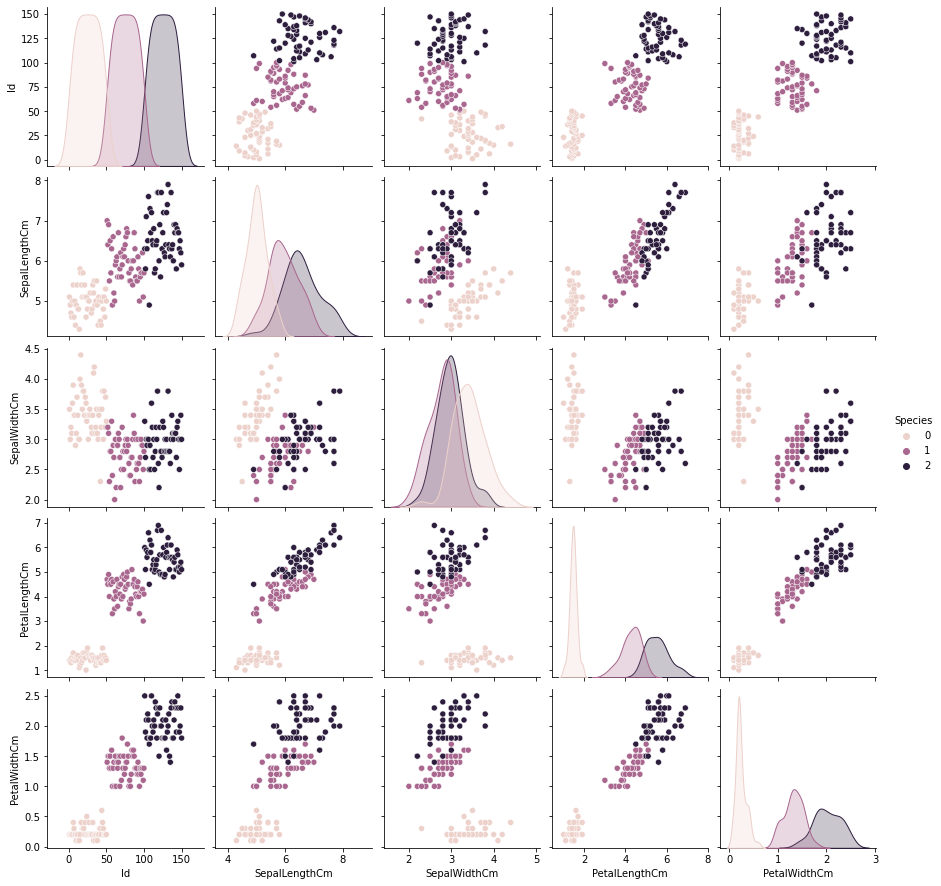

In [95]:
# plot data
sns.pairplot(df,hue="Species")

In [96]:
# split data into train and test
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(df.drop("Species",axis=1),df["Species"],test_size=0.2,random_state=0)

In [97]:
x = df.drop("Species",axis=1)
y = df["Species"]

In [98]:
# Define Models

In [99]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

## SVM Classifier

In [100]:
model_svm = SVC(kernel = 'linear')
k_fold = KFold(n_splits=10)
svm_predict = cross_val_predict(model_svm, x, y,  cv=k_fold)

In [101]:
# svc_pred = model_svm.predict(x_test)
print(svm_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [102]:
from sklearn.metrics import accuracy_score
svc_score = accuracy_score(y, svm_predict)
print("SVM accuracy: ",svc_score)

SVM accuracy:  0.9733333333333334


In [105]:
matrix_svc = confusion_matrix(y, svm_predict)
matrix_svc

array([[50,  0,  0],
       [ 2, 46,  2],
       [ 0,  0, 50]], dtype=int64)

<AxesSubplot:>

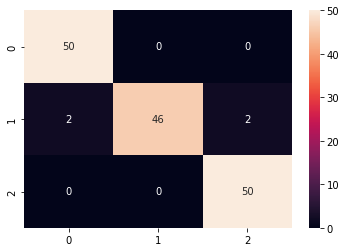

In [106]:
sns.heatmap(matrix_svc, annot=True)

## Decision Tree Classifier

In [107]:
model_dt = DecisionTreeClassifier()
dt_predict = cross_val_predict(model_dt, x, y,  cv=k_fold)

In [108]:
dt_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
dt_score = accuracy_score(y, dt_predict)
print("Decision Tree accuracy: ",dt_score)

SVM accuracy:  0.9666666666666667


In [110]:
matrix_dt = confusion_matrix(y, dt_predict)
matrix_dt

array([[50,  0,  0],
       [ 3, 45,  2],
       [ 0,  0, 50]], dtype=int64)

<AxesSubplot:>

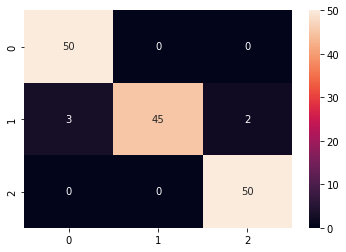

In [111]:
sns.heatmap(matrix_dt, annot=True)

## K Neighbors Classifier

In [112]:
model_knn = KNeighborsClassifier(n_neighbors=2)
knn_predict = cross_val_predict(model_knn, x, y,  cv=k_fold)

In [113]:
knn_score = accuracy_score(y, knn_predict)
print("KNN accuracy: ",knn_score)

SVM accuracy:  0.9666666666666667


In [114]:
matrix_lg = confusion_matrix(y, knn_predict)
matrix_lg

array([[50,  0,  0],
       [ 3, 45,  2],
       [ 0,  0, 50]], dtype=int64)

<AxesSubplot:>

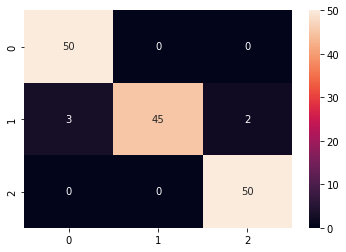

In [115]:
sns.heatmap(matrix_lg, annot=True)

# Models Performance

In [116]:
lii=[svc_score, dt_score, knn_score]

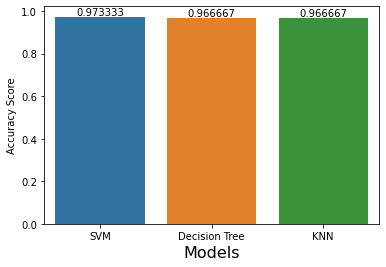

In [117]:
ax = sns.barplot(x=['SVM', 'Decision Tree', 'KNN'], y=lii)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Models", fontsize=16)
plt.ylabel("Accuracy Score")

plt.show()